In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.datasets import make_blobs
from sklearn.linear_model import LogisticRegression
from mpl_toolkits import mplot3d

In [2]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

x_min, x_max, step = -20, 20.1, 10000
y_min, y_max = 0, 1.1

x = np.linspace(x_min, x_max, step)

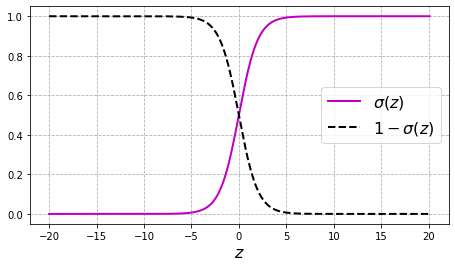

In [3]:
fig, ax = plt.subplots(figsize = (7.5, 4))

ax.plot(x, sigmoid(x), 'm', linewidth = 2, label = '$\sigma(z)$')
ax.plot(x, 1 - sigmoid(x), 'k--', linewidth = 2, label = '$1 - \sigma(z)$')

ax.grid(linestyle='--')
ax.legend(fontsize = 16, loc = 'best')
ax.set_xlabel('$z$', size = 16)

plt.savefig('sigmoid.png')
plt.show()

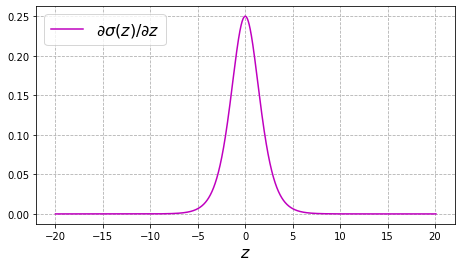

In [4]:
fig, ax = plt.subplots(figsize = (7.5, 4))

ax.plot(x, sigmoid(x) * (1 - sigmoid(x)), 'm', label = '$\partial\sigma(z)/\partial z$')

ax.grid(linestyle='--')
ax.set_xlabel('$z$', size = 16)
ax.legend(fontsize = 16, loc = 'upper left')

plt.savefig('derivative_sigmoid.png')
plt.show()

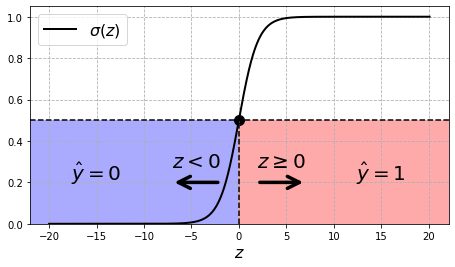

In [81]:
fig, ax = plt.subplots(figsize = (7.5, 4))

ax.plot(x, sigmoid(x), 'k', linewidth = 2, label = '$\sigma(z)$')

xx, yy = np.meshgrid([plt.xlim()[0], 0, 0, plt.xlim()[1]], [0, 1/2])
ax.pcolormesh(xx, yy, [[2, 2, 0, 0], [2,2,2,2]], cmap = cmap_light)

plt.text(15, 0.25, '$\hat{y} = 1$', size = 20,
         horizontalalignment='center',
         verticalalignment='center')

plt.text(-15, 0.25, '$\hat{y} = 0$', size = 20,
         horizontalalignment='center',
         verticalalignment='center')

plt.text(-4.5, 0.3, '$z < 0$', size = 20,
         horizontalalignment='center',
         verticalalignment='center')

plt.text(4.5, 0.3, '$z \geq 0$', size = 20,
         horizontalalignment='center',
         verticalalignment='center')

ax.annotate("", xy=(7, 0.2), xytext=(2, 0.2), size = 30, 
            arrowprops=dict(arrowstyle="->", lw=3.5))

ax.annotate("", xy=(-2, 0.2), xytext=(-7, 0.2), size = 30,
            arrowprops=dict(arrowstyle="<-", lw=3.5))

ax.plot([0, 0], [0, 1/2], 'k--')
ax.plot([ax.get_xlim()[0], ax.get_xlim()[1]], [1/2, 1/2], 'k--')

ax.scatter(0, 1/2, color = 'k', s= 100)

ax.grid(linestyle='--')
ax.legend(fontsize = 16, loc = 'upper left')
ax.set_xlabel('$z$', size = 16)

plt.savefig('decision_region_logistic_0.5.png')
plt.show()

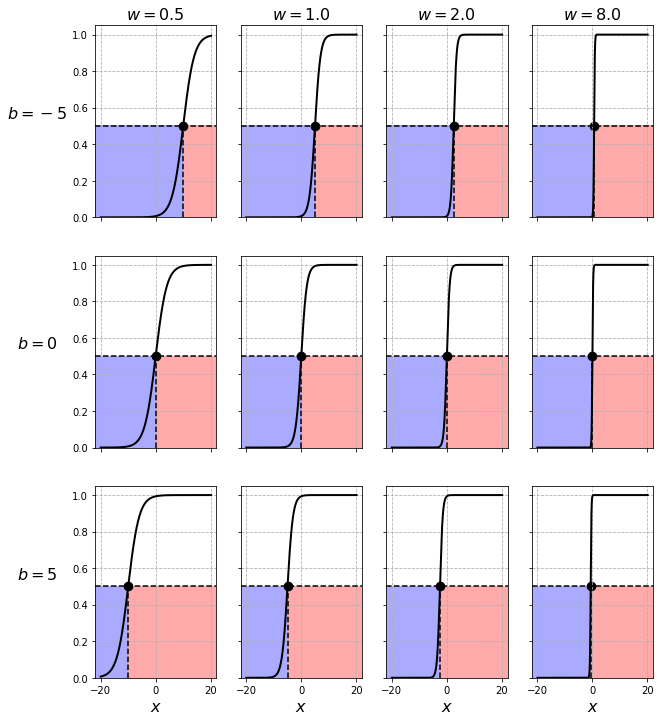

In [293]:
www = np.array([0.5, 1, 2, 8])
bbb = np.array([-5, 0, 5])
colors = ['m', 'g', 'c']

fig, axes = plt.subplots(len(bbb), len(www), sharex = True, sharey = True, figsize = (10, 4*len(bbb)))
for nb, b in enumerate(bbb):
    for nw, w in enumerate(www):
        ax = axes[nb, nw]
        ax.plot(x, sigmoid(w * x + b), 'k', linewidth = 2, label = '$w = {}, b = {}$'.format(w, b))
        lims = ax.get_xlim()
        xx, yy = np.meshgrid([lims[0], -b/w, -b/w, lims[1]], [0, 1/2])
        ax.pcolormesh(xx, yy, [[2, 2, 0, 0], [2,2,2,2]], cmap = cmap_light)
        ax.set_xlim(lims)

        ax.plot([-b/w, -b/w], [0, 1/2], 'k--')
        ax.plot([ax.get_xlim()[0], ax.get_xlim()[1]], [1/2, 1/2], 'k--')

        ax.scatter(-b/w, 1/2, color = 'k', s= 75)

        ax.grid(linestyle='--')

for ax, w in zip(axes[0], www):
    ax.set_title('$w = {}$'.format(w), size = 16)
for ax, b in zip(axes[:,0], bbb):
    ax.set_ylabel('$b = {}$'.format(b), rotation=0, size=16, labelpad=35)
for ax in axes[-1, :]:
    ax.set_xlabel('$x$', size = 16)
plt.savefig('decision_region_logistic_xspace.png')
plt.show()

## traspose...
# www = np.array([0.5, 1, 2, 8])
# bbb = np.array([-5, 0, 5])
# colors = ['m', 'g', 'c']

# fig, axes = plt.subplots(len(www), len(bbb), sharex = True, sharey = True, figsize = (7.5, 4*len(www)))
# for nw, w in enumerate(www):
#     for nb, b in enumerate(bbb):
#         ax = axes[nw, nb]
#         ax.plot(x, sigmoid(w * x + b), 'k', linewidth = 2, label = '$w = {}, b = {}$'.format(w, b))
#         lims = ax.get_xlim()
#         xx, yy = np.meshgrid([lims[0], -b/w, -b/w, lims[1]], [0, 1/2])
#         ax.pcolormesh(xx, yy, [[2, 2, 0, 0], [2,2,2,2]], cmap = cmap_light)
#         ax.set_xlim(lims)

#         ax.plot([-b/w, -b/w], [0, 1/2], 'k--')
#         ax.plot([ax.get_xlim()[0], ax.get_xlim()[1]], [1/2, 1/2], 'k--')

#         ax.scatter(-b/w, 1/2, color = 'k', s= 75)

#         ax.grid(linestyle='--')

# for ax, b in zip(axes[0], bbb):
#     ax.set_title('$b = {}$'.format(b), size = 16)
# for ax, w in zip(axes[:,0], www):
#     ax.set_ylabel('$w = {}$'.format(w), rotation=0, size=16, labelpad=35)
# for ax in axes[-1, :]:
#     ax.set_xlabel('$x$', size = 16)
# plt.savefig('decision_region_logistic_xspace.png')
# plt.show()

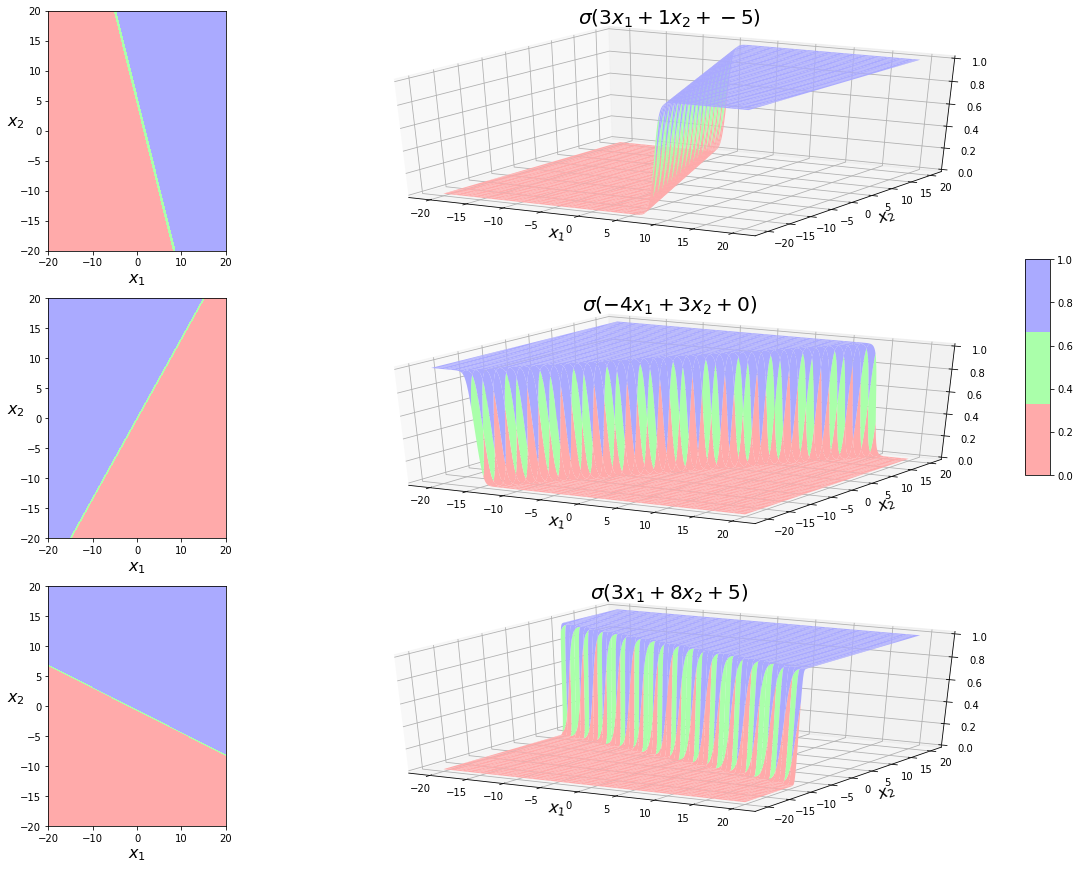

In [303]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib import gridspec

www1 = np.array([3, -4, 3])
www2 = np.array([1, 3, 8])
bbb = np.array([-5, 0, 5])

xx, yy = np.meshgrid(np.arange(-20, 20.1, 0.1), np.arange(-20, 20.1, 0.1))
domain = np.c_[xx.ravel(), yy.ravel()]

fig = plt.figure(figsize = (17.5, 15))
gs = gridspec.GridSpec(3, 2, width_ratios=[1, 4]) 
for q, (ax, w1, w2, b) in enumerate(zip(axes.flatten(), www1, www2, bbb)):
    z = sigmoid(w1 * domain[:, 0] + w2 * domain[:, 1] + b).reshape(xx.shape)
    
    ax = plt.subplot(gs[2*q])
    CS = ax.contourf(xx, yy, z, levels=2, cmap=cmap_light)
    ax.set_xlabel('$x_1$', size=16)
    ax.set_ylabel('$x_2$', rotation=0, size=16)
    
    ax = plt.subplot(gs[2*q + 1], projection='3d')
#     ax = fig.gca(projection='3d')

    surf = ax.plot_surface(xx, yy, z,
                           rstride=8, cstride=8,
                           cmap=cmap_light,
                           linewidth=0,
#                            antialiased=False
                          )
    ax.set_xlabel('$x_1$', size = 16)
    ax.set_ylabel('$x_2$', size = 16)
    ax.set_title('$\sigma({} x_1 + {} x_2 + {})$'.format(w1, w2, b), size = 20)
#     plt.colorbar(surf, shrink=0.5, aspect=10)
fig.subplots_adjust(right=0.9)
cbar_ax = fig.add_axes([0.9, 0.45, 0.02, 0.2])
plt.colorbar(surf, shrink=0.5, cax=cbar_ax)
plt.savefig('decision_region_logistic_xspace_3d.png')
plt.show()

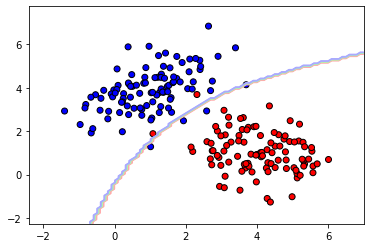

In [69]:
from scipy.stats import multivariate_normal
mu1, mu2 = np.array([1, 4]), np.array([4, 1]),
sigma1, sigma2 = np.array([[1, 0.6],[0.6, 1]]), np.array([[1, -0.3],[-0.3, 1]])

var1 = multivariate_normal(mean=mu1, cov=sigma1)
var2 = multivariate_normal(mean=mu2, cov=sigma2)

samples = np.concatenate((var1.rvs(size = 100), var2.rvs(size = 100)), axis=0)

indicator = np.concatenate((np.ones((100, 1)), np.zeros((100, 1))), axis=0)


xx, yy = np.meshgrid(np.arange(samples[:, 0].min() - 1, samples[:, 0].max() + 1, 0.1),
                     np.arange(samples[:, 1].min() - 1, samples[:, 1].max() + 1, 0.1))
    
domain = np.c_[xx.ravel(), yy.ravel()]

pdf1 = var1.pdf(domain).reshape(xx.shape)
pdf2 = var2.pdf(domain).reshape(xx.shape)
disc = pdf1 > pdf2

fig, ax = plt.subplots()

ax.contour(xx, yy, disc, cmap = cmap_light)

ax.scatter(samples[:, 0], samples[:, 1],
           c=indicator.ravel(),
           cmap=cmap_bold, alpha = 1, edgecolor="black")




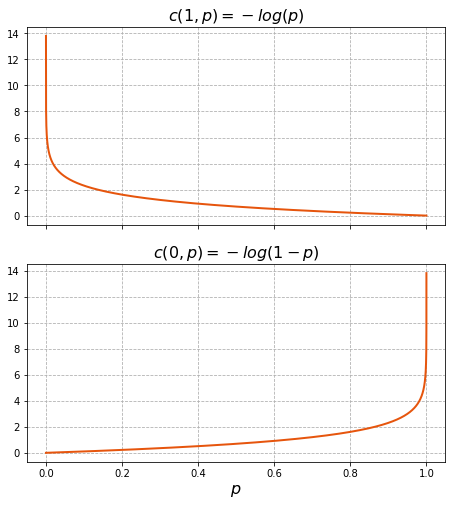

In [132]:
x_min, x_max, step1, step2 = 0, 1, 100, 100

x1 = np.linspace(x_min, x_max, step)[1:-1]
x2 = np.linspace(0, x1[0], step2)[1:-1]
x3 = np.linspace(x1[-1], 1, step2)[1:-1]
x = np.concatenate([x2, x1, x3])

titles = ['$c(1, p) = - log(p)$', '$c(0, p) = - log(1 - p)$']
y_vals = [-np.log(x), - np.log(1 - x)]

fig, axes = plt.subplots(2,1, sharex=True, figsize=(7.5, 8))

for ax, y, t in zip(axes.ravel(), y_vals, titles):
    ax.plot(x, y, color = "#E6550D", linewidth = 2)
    ax.grid(linestyle='--')
    ax.set_title(t, size=16)
axes[1].set_xlabel('$p$', size=16)

plt.savefig('cost_function_logistic.png')
plt.show()

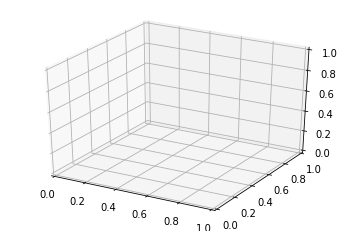

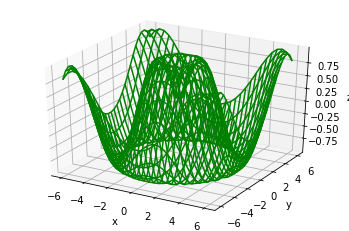

In [145]:
x = np.linspace(-10, 10, 100)
y = np.linspace(-10, 10, 100)
f1 = np.exp(x) / (np.exp(x) + np.exp(y))

fig = plt.figure()
ax = plt.axes(projection="3d")

def z_function(x, y):
    return np.sin(np.sqrt(x ** 2 + y ** 2))

x = np.linspace(-6, 6, 30)
y = np.linspace(-6, 6, 30)

X, Y = np.meshgrid(x, y)
Z = z_function(X, Y)


fig = plt.figure()
ax = plt.axes(projection="3d")
ax.plot_wireframe(X, Y, Z, color='green')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')

plt.show()




/home/julian/.local/lib/python3.6/site-packages/ipykernel_launcher.py:24: RuntimeWarning: divide by zero encountered in log
/home/julian/.local/lib/python3.6/site-packages/ipykernel_launcher.py:24: RuntimeWarning: divide by zero encountered in log
/home/julian/.local/lib/python3.6/site-packages/ipykernel_launcher.py:24: RuntimeWarning: divide by zero encountered in log


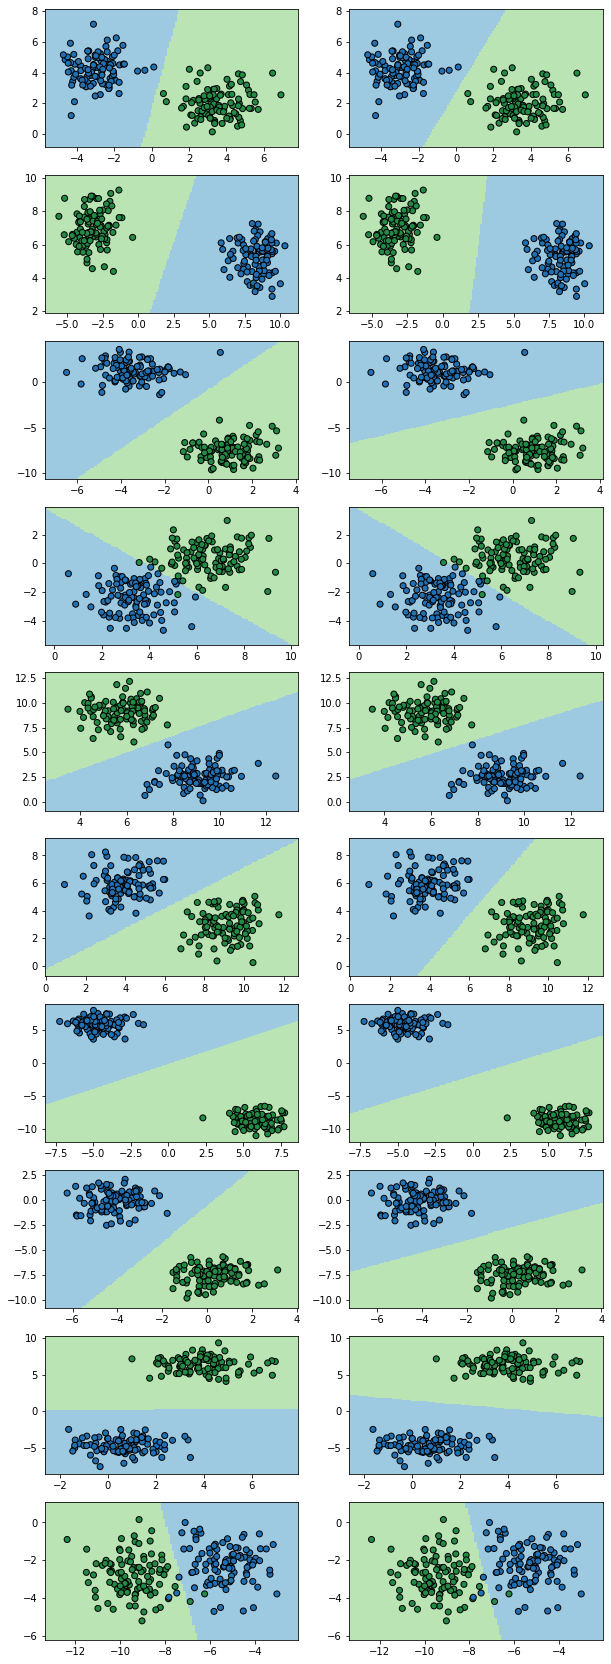

In [133]:
def create_training_set():
    X0, y = make_blobs(n_samples=[100, 100],
                   centers=None,
                   n_features=2,
                   cluster_std=1)
    y = y.reshape(-1, 1) # make y a column vector
    return np.hstack([np.ones((X0.shape[0], 1)), X0]), X0, y

def create_test_set(X0):
    xx, yy = np.meshgrid(np.arange(X0[:, 0].min() - 1, X0[:, 0].max() + 1, 0.1),
                         np.arange(X0[:, 1].min() - 1, X0[:, 1].max() + 1, 0.1))
    X_test = np.c_[xx.ravel(), yy.ravel()]
    X_test = np.hstack([np.ones((X_test.shape[0], 1)), X_test])
    return xx, yy, X_test

def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def apply_gradient_descent(theta, X, y, max_iter=1000, alpha=0.1):
    m = X.shape[0]
    cost_iter = []
    for _ in range(max_iter):
        p_hat = sigmoid(np.dot(X, theta))
        cost_J = -1/float(m) * (np.dot(y.T, np.log(p_hat)) + np.dot((1 - y).T, np.log(1 - p_hat)))
        grad_J = 1/float(m) * np.dot(X.T, p_hat - y)
        theta -= alpha * grad_J
        cost_iter.append(float(cost_J))
    return theta, cost_iter

cmap_light = ListedColormap(['#bae4b3', '#cbc9e2', '#9ecae1'])
cmap_bold = ListedColormap(['#238b45', '#6a51a3', '#2171b5'])

max_iter = 100000
alpha = 0.1

fig, ax = plt.subplots(10, 2, figsize = (10, 30))
all_cost_history = []

for n_fil in range(10):
    X_train, X0, y = create_training_set()
    xx, yy, X_test = create_test_set(X0)
    
    theta, cost_evolution = apply_gradient_descent(np.zeros((X_train.shape[1], 1)), X_train, y, max_iter, alpha)   
    all_cost_history.append(cost_evolution)
    
    y_pred = np.where(sigmoid(np.dot(X_test, theta)) > 0.5, 1, 0)
    y_pred = y_pred.reshape(xx.shape)
    ax[n_fil, 0].pcolormesh(xx, yy, y_pred, cmap = cmap_light)
    ax[n_fil, 0].scatter(X0[:, 0], X0[:, 1], c=y.ravel(), cmap=cmap_bold, alpha = 1, edgecolor="black")
    
    y = y.reshape(X_train.shape[0], )
    clf = LogisticRegression().fit(X0, y)
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    ax[n_fil, 1].pcolormesh(xx, yy, Z, cmap = cmap_light)
    ax[n_fil, 1].scatter(X0[:, 0], X0[:, 1], c=y, cmap=cmap_bold, alpha = 1, edgecolor="black")
#     print("intercept")
#     print(theta[0])
#     print(clf.intercept_)
#     print("coefs")
#     print(theta[1:].ravel())
#     print(clf.coef_[0])
#     print(10*"*")
plt.show()

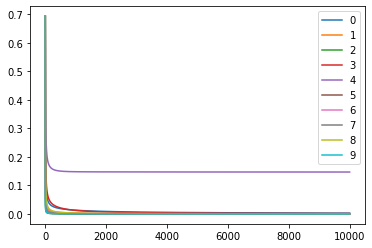

In [35]:
for n, c in enumerate(all_cost_history):
    plt.plot(c, label = n)
plt.legend()

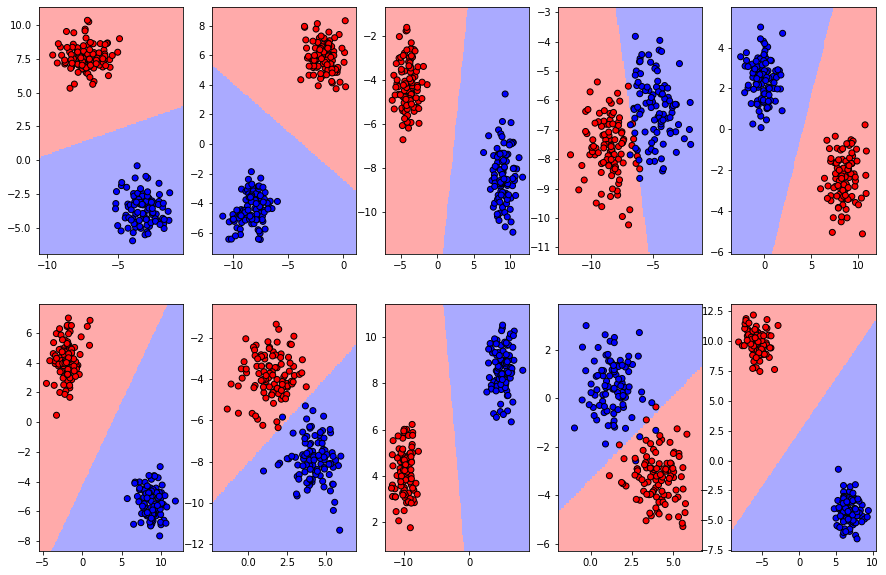

In [14]:
clf = LogisticRegression()
fig, ax = plt.subplots(2, 5, figsize = (15, 10))
axes = ax.ravel()
for ax in axes:
    X, y = make_blobs(n_samples=[100, 100], 
                      centers=None,
                      n_features=2,
                      cluster_std=1)

    clf.fit(X, y)
    xx, yy = np.meshgrid(np.arange(X[:, 0].min() - 1, X[:, 0].max() + 1, 0.1),
                         np.arange(X[:, 1].min() - 1, X[:, 1].max() + 1, 0.1))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    ax.pcolormesh(xx, yy, Z, cmap = cmap_light)
    ax.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold, alpha = 1, edgecolor="black")
plt.show()

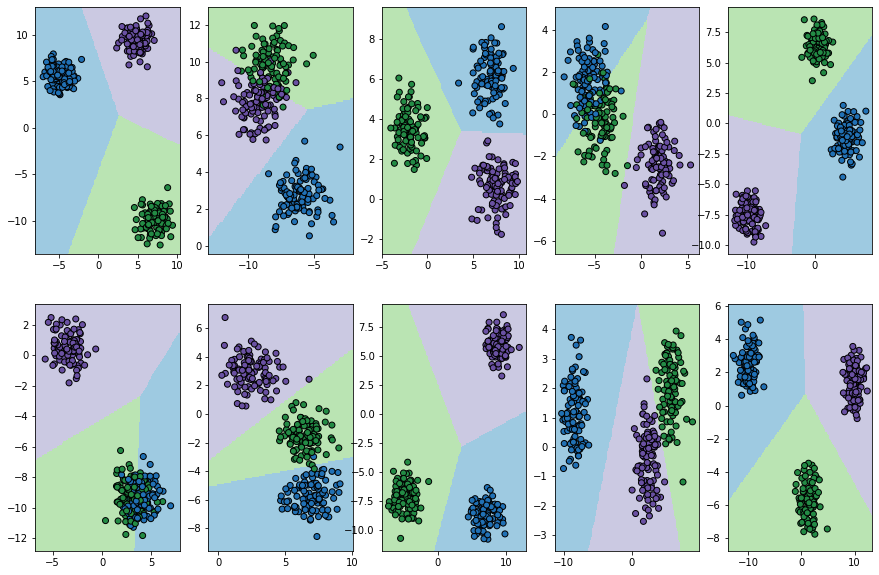

In [113]:
clf = LogisticRegression()
fig, ax = plt.subplots(2, 5, figsize = (15, 10))
axes = ax.ravel()

cmap_light = ListedColormap(['#bae4b3', '#cbc9e2', '#9ecae1'])
cmap_bold = ListedColormap(['#238b45', '#6a51a3', '#2171b5'])

for ax in axes:
    X, y = make_blobs(n_samples=[100, 100, 100], 
                      centers=None,
                      n_features=2,
                      cluster_std=1)
    
    clf.fit(X, y)
    xx, yy = np.meshgrid(np.arange(X[:, 0].min() - 1, X[:, 0].max() + 1, 0.1),
                         np.arange(X[:, 1].min() - 1, X[:, 1].max() + 1, 0.1))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    ax.pcolormesh(xx, yy, Z, cmap = cmap_light)
    ax.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold, alpha = 1, edgecolor="black")
plt.show()